In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [3]:
d=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
c=d.class_names
c

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
import matplotlib.pyplot as plt

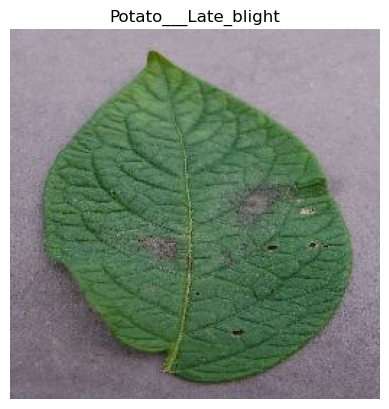

In [6]:
for image_batch,labels_batch in d.take(2):
    
    plt.imshow(image_batch[2].numpy().astype("uint8"))
    plt.title(c[labels_batch[2]])
    plt.axis("off")

    

In [7]:
d.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [9]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [12]:
history = model.fit(
    d,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=30,
    
)

Epoch 1/30
68/68 [==============================] - 78s 1s/step - loss: 0.9143 - accuracy: 0.4814
Epoch 2/30
68/68 [==============================] - 81s 1s/step - loss: 0.7138 - accuracy: 0.6575
Epoch 3/30
68/68 [==============================] - 84s 1s/step - loss: 0.4183 - accuracy: 0.8243
Epoch 4/30
68/68 [==============================] - 87s 1s/step - loss: 0.3765 - accuracy: 0.8480
Epoch 5/30
68/68 [==============================] - 79s 1s/step - loss: 0.2522 - accuracy: 0.8913
Epoch 6/30
68/68 [==============================] - 82s 1s/step - loss: 0.2144 - accuracy: 0.9136
Epoch 7/30
68/68 [==============================] - 81s 1s/step - loss: 0.1919 - accuracy: 0.9243
Epoch 8/30
68/68 [==============================] - 88s 1s/step - loss: 0.1039 - accuracy: 0.9633
Epoch 9/30
68/68 [==============================] - 81s 1s/step - loss: 0.0779 - accuracy: 0.9735
Epoch 10/30
68/68 [==============================] - 87s 1s/step - loss: 0.0553 - accuracy: 0.9772
Epoch 11/30
68/68 [

In [13]:
a=model.evaluate(d,steps=len(d),verbose=2)
print(a)

68/68 - 16s - loss: 3.4541e-05 - accuracy: 1.0000 - 16s/epoch - 242ms/step
[3.45407534041442e-05, 1.0]


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 866ms/step
predicted label: Potato___Late_blight


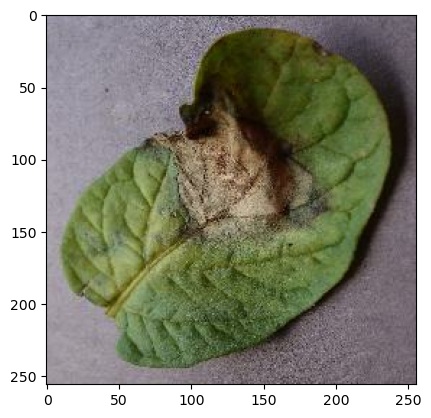

In [14]:
import numpy as np


for image_batch, label_batch in d:
    first_image = image_batch[1]
    first_label = int(labels_batch[1])
    
    print("first image to predict")
    plt.imshow((image_batch[0].numpy().astype('uint8')))
    print("actual label:",c[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",c[np.argmax(batch_prediction[1])])
    
    break

In [15]:
model.save("potato.h5")